In [1]:
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.DataFrame(columns=["Location", "Week", "Rating", "Pacing", "Track"])

# Clean 2016 Data

The data for 2016 is in multiple files.

In [3]:
# Create empty DataFrame to dump data from csv files.
df_2016 = pd.DataFrame()

# Regex grabs weeks 1 - 7 and location from file name.
p = re.compile("Anon (Week \d) Feedback - (\w+).csv")
for csv in glob.glob("datasets/2016/*.csv"):
    match = p.search(csv)
    if match:
        csv_df = pd.read_csv(csv)
        csv_df['Week'] = match.group(1)[-1]
        csv_df['Location'] = match.group(2)
        df_2016 = df_2016.append(csv_df, ignore_index=True, sort=False)
pd.options.display.max_rows = 991
df_2016.head()

Timestamp  \
0  8/5/2016 1:39:41   
1  8/5/2016 1:40:47   
2  8/5/2016 1:40:50   
3  8/5/2016 1:42:44   
4  8/5/2016 1:45:13   

  How would you rate your overall satisfaction with the Summer Academy this week?  \
0                                                  3                                
1                                                  4                                
2                                                  4                                
3                                                  4                                
4                                                  5                                

  How well is the schedule paced? Week Location  \
0                               3    7   Taipei   
1                               3    7   Taipei   
2                               3    7   Taipei   
3                               4    7   Taipei   
4                               4    7   Taipei   

   How well are the tutorials paced? What track are you in? Unnamed: 0  
0                                NaN                    NaN        NaN  
1                                NaN                    NaN        NaN  
2                                NaN                    NaN        NaN  
3                                NaN                    NaN        NaN  
4                                NaN                    NaN        NaN

In [4]:
# Only select the columns I'm interested in 
df_2016 = df_2016.iloc[:, [1, 2, 3, 4, 5, 6]]
# df_2016.head()
df_2016.rename(columns={
    "How would you rate your overall satisfaction with the Summer Academy this week?": "Rating",
    "How well is the schedule paced?": "Pacing",
    "How well are the tutorials paced?": "Pacing",
    "What track are you in?": "Track"
}, inplace=True)

# Combine columns with similar names.
def sjoin(x):
    return ';'.join(x[x.notnull()].astype(str))
df_2016 = df_2016.groupby(level=0, axis=1).apply(lambda x: x.apply(sjoin, axis=1))
df_2016.head()

Location Pacing Rating Track Week
0   Taipei    3.0      3          7
1   Taipei    3.0      4          7
2   Taipei    3.0      4          7
3   Taipei    4.0      4          7
4   Taipei    4.0      5          7

One more thing! There's a row with unusable data. That will be curbed!

In [5]:
df_2016.drop(923, inplace=True)

Another thing to note is that the Rating system for 2016 is based on a 5 point scale. The 2017 data as we will see next has a 10 point scale.

In [6]:
df_2016["Rating"] = pd.to_numeric(df_2016.Rating).astype(int)

In [7]:
def to_10_point_scale(element):
    return element * 2

In [8]:
df_2016["Rating"] = df_2016.Rating.apply(to_10_point_scale)
df_2016.head()

Location Pacing  Rating Track Week
0   Taipei    3.0       6          7
1   Taipei    3.0       8          7
2   Taipei    3.0       8          7
3   Taipei    4.0       8          7
4   Taipei    4.0      10          7

Now the dataset is reletavily clean and ready to be combined with week 8's data.

The data is very different compared to the rest of the csvs. So we'll rename and drop columns to match the others.


In [9]:
df_week8 = pd.read_csv('datasets/2016/Week 8 Feedback (2016, incomplete) - results.csv')
df_week8.head()

#  \
0  00b836bda84e6bdbe780af97e249e59f   
1  39dde6dc0e1e375845d756fc7e39fc5f   
2  5e56b9de91670b308cb98dd2848b8739   
3  641081d05785b47a0f17448625da0d49   
4  c29bdd4f5678d78b450f4494e0f53c8c   

   How likely is it that you would recommend the Make School Summer Academy to a friend?  \
0                                                 10                                       
1                                                 10                                       
2                                                 10                                       
3                                                  9                                       
4                                                  3                                       

        location                track Start Date (UTC) Submit Date (UTC)  \
0       New York           summerApps      9/7/16 1:03       9/7/16 1:04   
1  San Francisco          summerIntro      9/7/16 1:03       9/7/16 1:04   
2       New York          summerIntro      9/7/16 1:03       9/7/16 1:05   
3      Sunnyvale  summerApps (4-week)      9/7/16 1:04       9/7/16 1:06   
4  San Francisco          summerIntro      9/7/16 1:04       9/7/16 1:11   

   Network ID  
0  3212b7a834  
1  f4954355aa  
2  3d69ca289b  
3  261608f95d  
4  d6672ddf6f

In [10]:
# Only select the columns that match other datasets.
df_week8 = df_week8.iloc[:, [1, 2, 3]]
# Rename columns.
df_week8.rename(columns={
    "How likely is it that you would recommend the Make School Summer Academy to a friend?": "Rating",
    "location": "Location",
    "track": "Track"
}, inplace=True)
df_week8["Week"] = 8

In [11]:
df_week8.head()

Rating       Location                Track  Week
0      10       New York           summerApps     8
1      10  San Francisco          summerIntro     8
2      10       New York          summerIntro     8
3       9      Sunnyvale  summerApps (4-week)     8
4       3  San Francisco          summerIntro     8

Before I can add this dataframe to the 2016 dataframe I need to convert the rating column to integers

In [12]:
df_week8['Rating'] = pd.to_numeric(df_week8.Rating)
df_week8.Rating.describe()

count    65.000000
mean      8.646154
std       1.735932
min       3.000000
25%       8.000000
50%       9.000000
75%      10.000000
max      10.000000
Name: Rating, dtype: float64

In [13]:
df_2016.append(df_week8, sort=False, ignore_index=True)
df_2016["Year"] = "2016"
df_2016.head()

Location Pacing  Rating Track Week  Year
0   Taipei    3.0       6          7  2016
1   Taipei    3.0       8          7  2016
2   Taipei    3.0       8          7  2016
3   Taipei    4.0       8          7  2016
4   Taipei    4.0      10          7  2016

# Clean 2017 Data

There's not much that needs to be done for the 2017 dataset as it's all neatly packed into one csv.

In [14]:
df_2017 = pd.read_csv('datasets/2017/Student Feedback Surveys-Superview.csv')
# Tidy columns by removing 'ID' and renaming 'Rating (Num)'.
df_2017 = df_2017.drop(columns=['ID']).rename(columns={"Rating (Num)": "Rating", "Schedule Pacing": "Pacing"})
# Drop any NA/null data
df_2017 = df_2017.dropna()
# Make 'Rating' column numerical.
df_2017['Rating'] = pd.to_numeric(df_2017.Rating)
df_2017.head()

Location           Track    Week  Rating             Pacing
0  San Francisco  Apps, Explorer  Week 1       3         Just right
1    Los Angeles            Apps  Week 1       4  A little too fast
2  San Francisco           Games  Week 1       4       Way too slow
4  New York City  Apps, Explorer  Week 1       4         Just right
5   Redwood City            Apps  Week 1       5         Just right

The pacing and week are string values, but I want them to be integers to make it easier to calculate stuff.

In [15]:
def pace_to_int(pace):
    if pace == "Way too slow":
        return 1
    elif pace == "A little too slow":
        return 2
    elif pace == "Just right":
        return 3
    elif pace == "A little too fast":
        return 4
    elif pace == "Way too fast":
        return 5

def week_to_int(week):
    return int(week[-1])

df_2017["Pacing"] = df_2017.Pacing.apply(pace_to_int)
df_2017["Week"] = df_2017.Week.apply(week_to_int)
df_2017.head()

Location           Track  Week  Rating  Pacing
0  San Francisco  Apps, Explorer     1       3       3
1    Los Angeles            Apps     1       4       4
2  San Francisco           Games     1       4       1
4  New York City  Apps, Explorer     1       4       3
5   Redwood City            Apps     1       5       3

In [16]:
df_2017["Year"] = "2017"

# Combine

Now I can combine the two dataframes

In [17]:
df = df.append(df_2016, ignore_index=True, sort=False)
df = df.append(df_2017, ignore_index=True, sort=False)

In [18]:
df

Location Week Rating Pacing            Track  Year
0            Taipei    7      6    3.0                   2016
1            Taipei    7      8    3.0                   2016
2            Taipei    7      8    3.0                   2016
3            Taipei    7      8    4.0                   2016
4            Taipei    7     10    4.0                   2016
5            Taipei    7      8    3.0                   2016
6            Taipei    7      8    3.0                   2016
7            Taipei    7     10    3.0                   2016
8            Taipei    7     10    3.0                   2016
9            Taipei    7     10    3.0                   2016
10           Taipei    7      6    3.0                   2016
11            Tokyo    6      6    4.0                   2016
12            Tokyo    6      8    3.0                   2016
13            Tokyo    6      8    1.0                   2016
14            Tokyo    6      8    2.0                   2016
15            Tokyo    6     10    4.0                   2016
16            Tokyo    6      6    3.0                   2016
17            Tokyo    6     10    5.0                   2016
18            Tokyo    6      8    2.0                   2016
19            Tokyo    6      6    4.0                   2016
20            Tokyo    6     10    3.0                   2016
21            Tokyo    6     10    3.0                   2016
22            Tokyo    6      8    4.0                   2016
23            Tokyo    6      8    3.0                   2016
24        Singapore    1      4    3.0                   2016
25        Singapore    1      4    3.0                   2016
26        Singapore    1      6    3.0                   2016
27        Singapore    1      8    4.0                   2016
28        Singapore    1      8    4.0                   2016
29        Singapore    1      8    4.0                   2016
30        Singapore    1      8    3.0                   2016
31        Singapore    1      8    3.0                   2016
32        Singapore    1      8    4.0                   2016
33        Singapore    1      8    3.0                   2016
34        Singapore    1      8    3.0                   2016
35        Singapore    1     10    5.0                   2016
36               LA    7      6    2.0            Intro  2016
37               LA    7     10    3.0            Intro  2016
38               LA    7      8    2.0            Games  2016
39               LA    7      8    3.0            Intro  2016
40               LA    7      8    3.0            Games  2016
41               LA    7     10    3.0            Games  2016
42               LA    7      8    4.0            Intro  2016
43               LA    7     10    3.0            Games  2016
44               LA    7     10    3.0            Games  2016
45               SF    4     10    3.0             Apps  2016
46               SF    4      8    3.0             Apps  2016
47               SF    4      8    4.0             Apps  2016
48               SF    4      6    4.0             Apps  2016
49               SF    4      8    4.0             Apps  2016
50               SF    4      6    4.0             Apps  2016
51               SF    4      8    3.0             Apps  2016
52               SF    4     10    3.0             Apps  2016
53               SF    4      8    3.0             Apps  2016
54               SF    4      8    3.0             Apps  2016
55               SF    4     10    2.0             Apps  2016
56               SF    4      8    3.0            Games  2016
57               SF    4      8    3.0            Games  2016
58               SF    4     10    4.0            Games  2016
59               SF    4     10    5.0            Games  2016
60               SF    4     10    3.0            Games  2016
61               SF    4     10    4.0            Intro  2016
62               SF    4      6    4.0            Intro  2016
63               SF    4      8    4.0     

# On To The Questions

With the data combined, we can now do some calculations.

- Which track had the most promoters/detractors?
- What year had the greater NPS score?
- What is the probability that someone who complains about schedule pacing (too fast/too slow) was a detractor?

## Which track had the most promoters/detractors?


For this analysis we'll only need the Rating and Track columns.

Another thing to note is that there are some entries withouth data for the "Track" column. In these cases I'll assume that it's the popular track of Make School which is the App track, instead of ignoring the data. 

In [19]:
track_df = df.iloc[:, [2, 4]]
# Replace empty Track entries with "Apps"
track_df["Track"] = track_df.Track.replace("", "Apps")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Some of the values under "Rating" appear as objects. We'll fix this first before we do any calculations.

In [20]:
def convert_to_int(element):
    return int(element)

In [21]:
track_df["Rating"] = pd.to_numeric(track_df.Rating).astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Next we'll convert the "Rating" column to a category type with 3 possible values: Detractor, Passive, and Promoter.

In [22]:
def rating_to_type(rating):
    rating = int(rating)
    if rating < 6:
        return "Detractor"
    elif (rating >= 6) & (rating < 9):
        return "Passive"
    elif rating >= 9:
        return "Promoter"

track_df["Rating"] = track_df.Rating.apply(rating_to_type).astype('category')
track_df.Rating.value_counts()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Passive      1157
Promoter     1094
Detractor      81
Name: Rating, dtype: int64

So it seems there are quite a lot of detractors. Wonder which tracks are contributing to this high number.

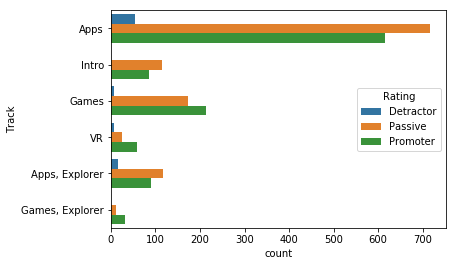

In [23]:
sns.countplot(y="Track", hue="Rating", data=track_df)

From this chart we see that the Apps track has the most promoters total. However, it's also visible that it had the most participants in general (evident by the high number of each).

This is making me think, perhaps an nps score for each track would be a better indicator of performance, though I still feel as though this isn't as reliable as I'd like it to be, due to the wide range in participants for each track.

## NPS scores for each Track

First thing to do is create an empty data frame with the index and columns of interest.

In [24]:
tracks = track_df.Track.unique()
track_nps_df = pd.DataFrame(index=tracks, columns=["NPS"])

In [25]:
def calculate_nps(data):
    # Grab detractors and promoters.
    df_detractors = data[data["Rating"] == "Detractor"]
    df_promoters = data[data["Rating"] == "Promoter"]
    
    # Calculate and return nps score.
    nps_score = (df_promoters.Rating.count() - df_detractors.Rating.count()) / data.Rating.count()
    return nps_score

In [26]:
for track in tracks:
    nps_score = calculate_nps(track_df[track_df["Track"] == track])
    track_nps_df.loc[track].NPS = nps_score

In [45]:
track_nps_df

NPS
Apps             0.406069
Intro            0.427136
Games            0.528061
VR               0.577778
Apps, Explorer   0.339286
Games, Explorer   0.72093

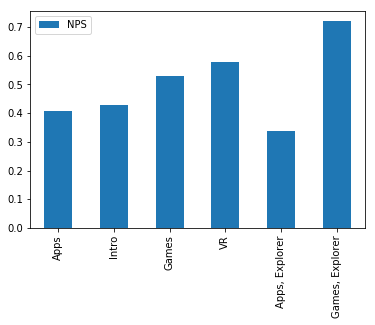

In [46]:
track_nps_df.plot.bar()

In conclusion, the Apps track had the most promoters (and detractors), it seems that the games track had a higher overall satisfaction among its students.

However, looking at this data, I see that if we combined the apps tracks and games tracks, which I feel is a better representation of the overall satisfaction of the school, we would get much better scores for each.

But now my question is, which year had the best scores?

# What year had the greater NPS score?

For this question all we need are the Rating and Year columns, so let's select that first.

In [28]:
year_df = df.iloc[:, [2, 5]]
year_df.head()

Rating  Year
0      6  2016
1      8  2016
2      8  2016
3      8  2016
4     10  2016

Next up convert ratings to categorical data

In [29]:
year_df["Rating"] = year_df.Rating.apply(rating_to_type).astype('category')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


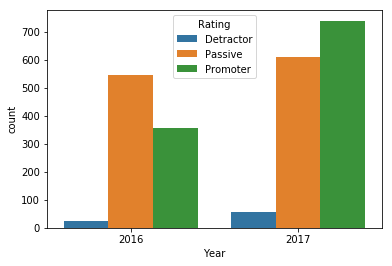

In [30]:
sns.countplot(x="Year", hue="Rating", data=year_df)

Looks like 2017 had the higher number of everything. Looking at the plot it's easy to see that 2017 takes the lead, but I still want to see the actual scores for each year.

In [57]:
year_nps_df = pd.DataFrame(index=year_df.Year.unique(), columns=["NPS"])

for year in year_df.Year.unique():
    frame = year_df[year_df["Year"] == year]
    year_nps_df.loc[year] = calculate_nps(frame)

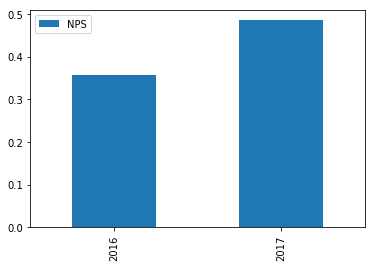

In [59]:
year_nps_df.plot.bar()

Just what we expected.

# What is the probability that someone who complains about schedule pacing was a detractor?

Back to the original data frame, this time our focus will be on the Rating and Pacing.

In [76]:
pacing_rating_df = df.iloc[:, [2, 3]]
pacing_rating_df.head()

Rating Pacing
0      6    3.0
1      8    3.0
2      8    3.0
3      8    4.0
4     10    4.0

We'll also make Pacing a numberical category.

In [78]:
pacing_rating_df["Pacing"] = pd.to_numeric(pacing_rating_df.Pacing).astype("category")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


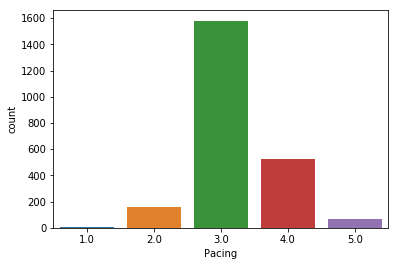

In [81]:
sns.countplot(x="Pacing", data=pacing_rating_df)

Looks like most people found the pacing of their track just right.

In [82]:
pacing_rating_df["Rating"] = pacing_rating_df.Rating.apply(rating_to_type)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


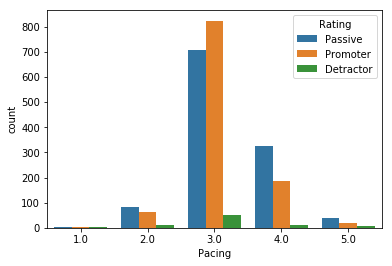

In [84]:
sns.countplot(x="Pacing", hue="Rating", data=pacing_rating_df)

According to the chart, most of our detractors consider the pacing to be just right as well.

In order to compare pacing values, we have to convert the column back to int type.

In [107]:
pacing_rating_df["Pacing"] = pacing_rating_df.Pacing.astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
bad_pacing_df = pacing_rating_df[pacing_rating_df["Pacing"] != 3]

In [113]:
bad_pacing_detractor_df = bad_pacing_df[bad_pacing_df["Rating"] == "Detractor"]

Now we've collected all the detractors who disliked the pacing of their track.

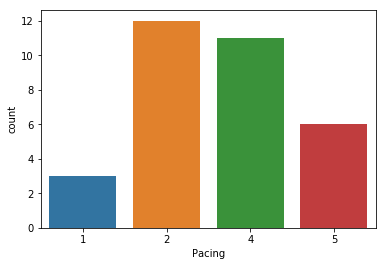

In [116]:
sns.countplot(x="Pacing", data=bad_pacing_detractor_df)

In [120]:
probability = (bad_pacing_detractor_df.Pacing.count() / pacing_rating_df.Pacing.count()) * 100
probability

1.3722126929674099

Pretty low chance. Looks like majority of the students were satisfied with the pacing.